In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import utils as np_utils

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


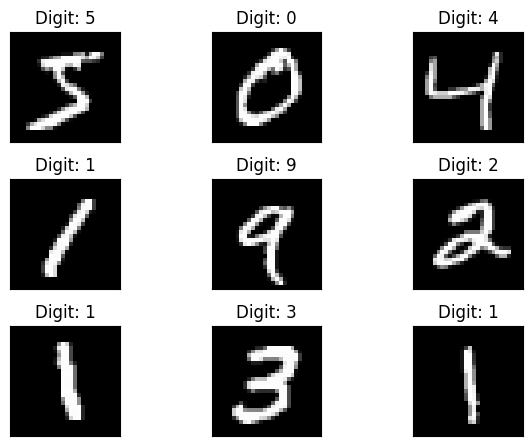

In [4]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [5]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [6]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10

print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [12]:
model = Sequential()

#1st hidden layer
model.add(Dense(16, input_shape=(784,)))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

#2nd hidden layer
model.add(Dense(12))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

#3rd hidden layer
model.add(Dense(38))
model.add(Activation('relu'))
#model.add(Dropout(0.4))
model.add(Dense(48))
model.add(Activation('relu'))
#Output layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                12560     
                                                                 
 activation_5 (Activation)   (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 12)                204       
                                                                 
 activation_6 (Activation)   (None, 12)                0         
                                                                 
 dense_7 (Dense)             (None, 38)                494       
                                                                 
 activation_7 (Activation)   (None, 38)                0         
                                                                 
 dense_8 (Dense)             (None, 48)               

In [14]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [15]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=64, epochs=15,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/15
938/938 - 5s - loss: 0.4661 - accuracy: 0.8579 - val_loss: 0.2459 - val_accuracy: 0.9259 - 5s/epoch - 5ms/step
Epoch 2/15
938/938 - 3s - loss: 0.2289 - accuracy: 0.9319 - val_loss: 0.2103 - val_accuracy: 0.9351 - 3s/epoch - 3ms/step
Epoch 3/15
938/938 - 2s - loss: 0.1881 - accuracy: 0.9434 - val_loss: 0.1859 - val_accuracy: 0.9455 - 2s/epoch - 2ms/step
Epoch 4/15
938/938 - 2s - loss: 0.1658 - accuracy: 0.9492 - val_loss: 0.1670 - val_accuracy: 0.9509 - 2s/epoch - 2ms/step
Epoch 5/15
938/938 - 2s - loss: 0.1487 - accuracy: 0.9549 - val_loss: 0.1597 - val_accuracy: 0.9520 - 2s/epoch - 2ms/step
Epoch 6/15
938/938 - 2s - loss: 0.1378 - accuracy: 0.9576 - val_loss: 0.1516 - val_accuracy: 0.9541 - 2s/epoch - 2ms/step
Epoch 7/15
938/938 - 4s - loss: 0.1300 - accuracy: 0.9596 - val_loss: 0.1472 - val_accuracy: 0.9558 - 4s/epoch - 4ms/step
Epoch 8/15
938/938 - 3s - loss: 0.1203 - accuracy: 0.9628 - val_loss: 0.1474 - val_accuracy: 0.9564 - 3s/epoch - 3ms/step
Epoch 9/15
938/938 - 2s 

In [16]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 0s - loss: 0.1375 - accuracy: 0.9612 - 428ms/epoch - 1ms/step
Test Loss 0.13745208084583282
Test Accuracy 0.9611999988555908
